In [1]:
import numpy as np
import pandas as pd
from scipy.spatial.distance import cdist
from scipy.optimize import minimize
from scipy.optimize import basinhopping
import matplotlib.pyplot as plt
import time

def LJ(r):
    r6 = r**6
    r12 = r6*r6
    return 4*(1/r12 - 1/r6)

def Total_Energy(positions):
    """
    Calculate the total energy
    input:
    positions: 3*N array which represents the atomic positions
    output
    E: the total energy
    """
    E = 0
    N_atom = int(len(positions)/3)

    for i in range(N_atom-1):
        for j in range(i+1, N_atom):
            pos1 = positions[i*3:(i+1)*3]
            pos2 = positions[j*3:(j+1)*3]
            #print('pos1:  ', pos1)
            #print('pos2:  ', pos2)
            dist = np.linalg.norm(pos1-pos2)
            #print(i,j, dist)
            E += LJ(dist)
    return E

            
def init_pos(N, L=5):
    return L*np.random.random_sample((N*3,))

N_attempts = 50
f_values = []
x_values = []


def ground_state_potential(N_atom, method):
    
    for i in range(N_attempts):
        pos = init_pos(N_atom)
        res = minimize(Total_Energy, pos, method= 'CG', tol=1e-4)
        f_values.append(res.fun)
        x_values.append(res.x)

    return min(f_values)

In [2]:
indexarrays = [['Nelder-Mead','Nelder-Mead',
                'CG','CG',
                'BFGS','BFGS'],
               ['ground state','computation time',
                'ground state','computation time',
                'ground state','computation time',]]
df = pd.DataFrame(columns = range(3,21), index = indexarrays )


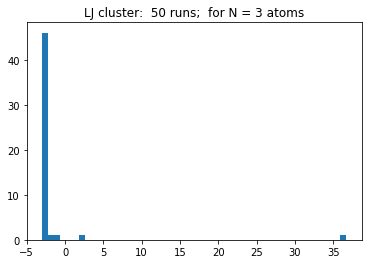

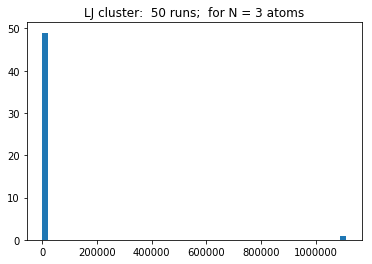

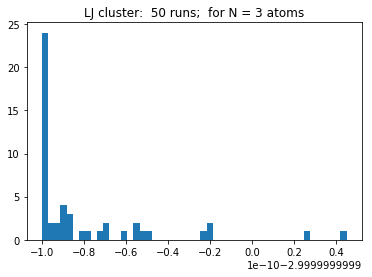

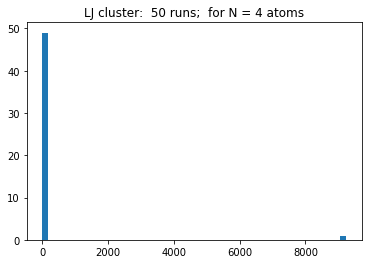

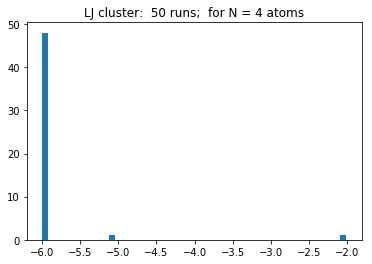

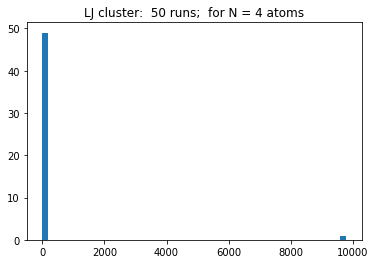

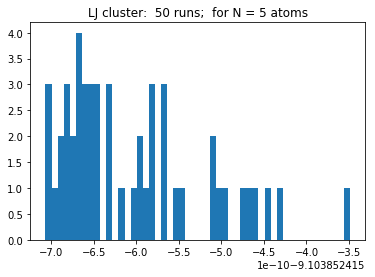

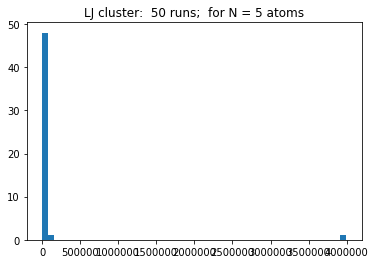

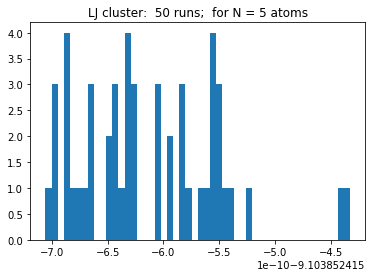

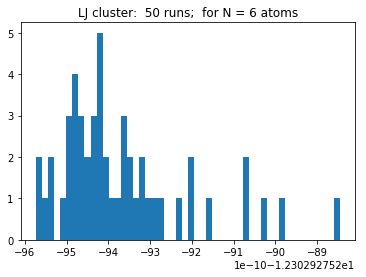

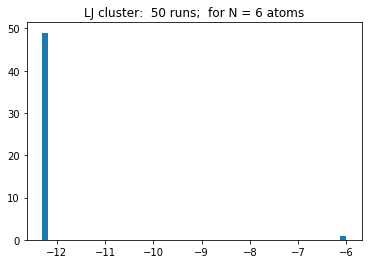

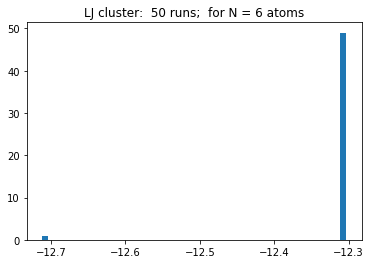

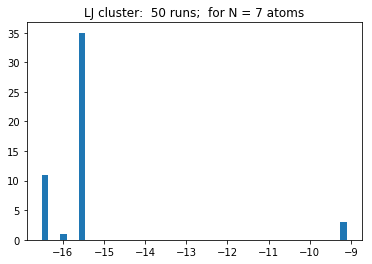

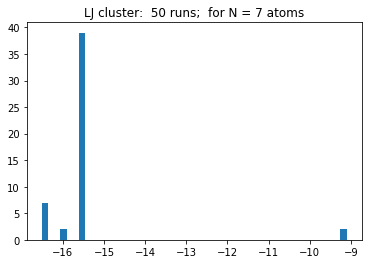

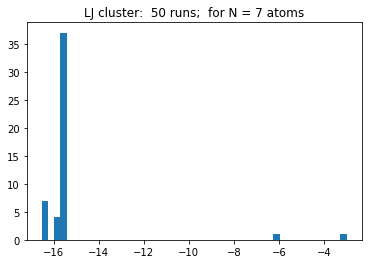

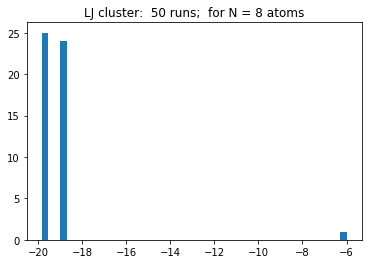

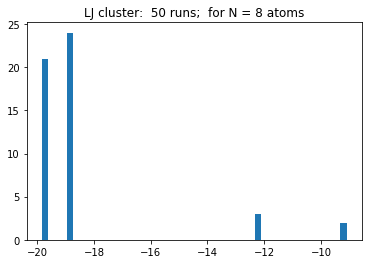

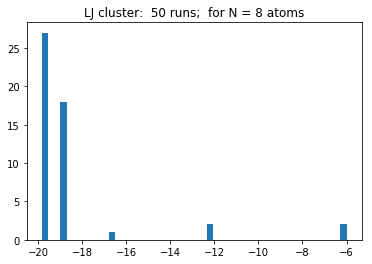

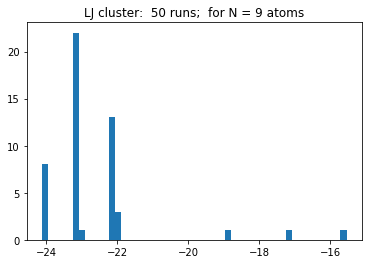

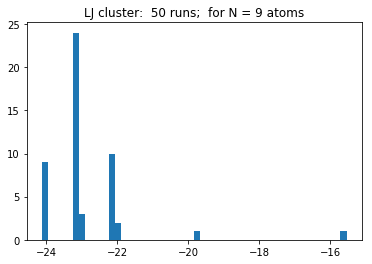

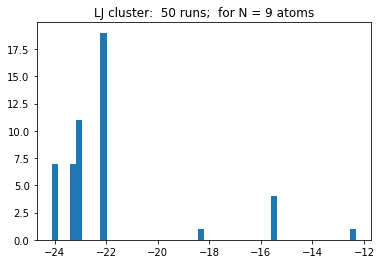

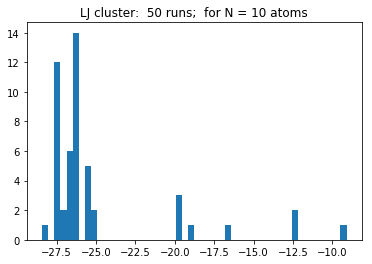

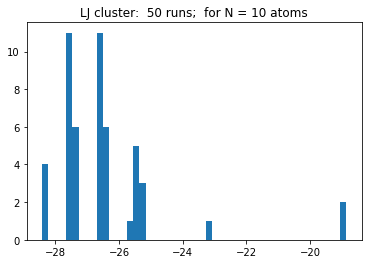

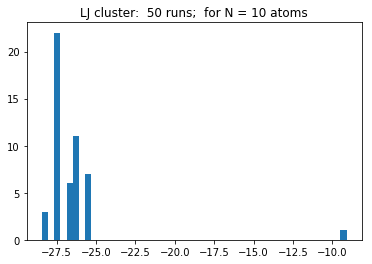

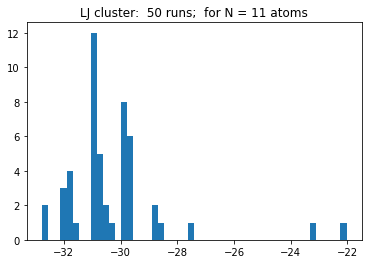

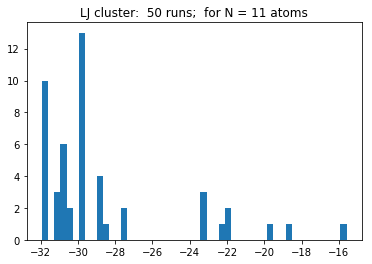

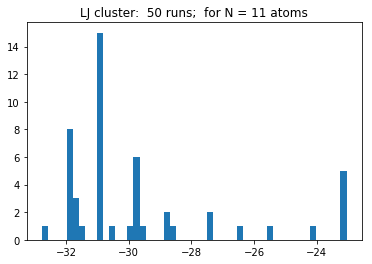

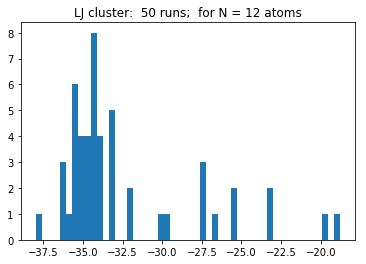

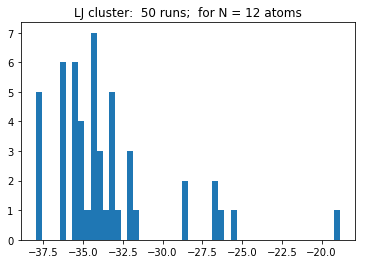

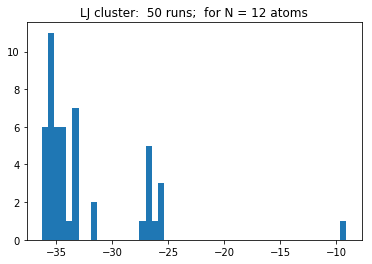

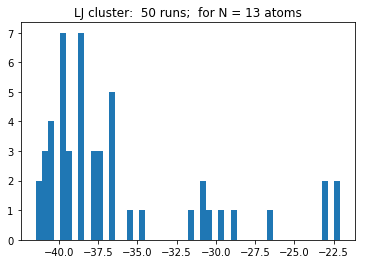

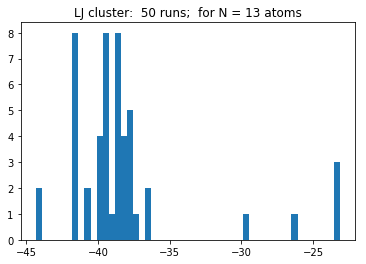

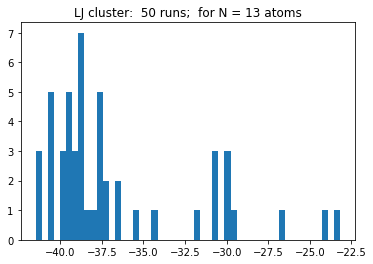

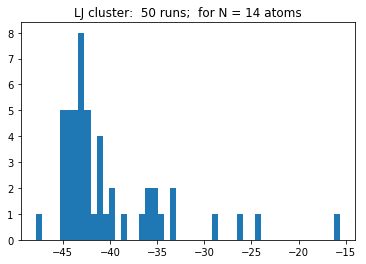

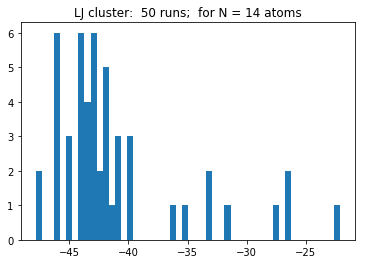

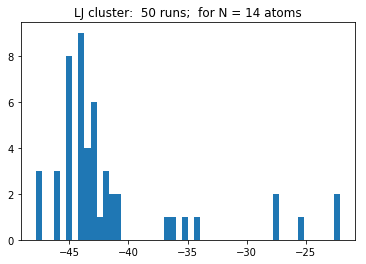

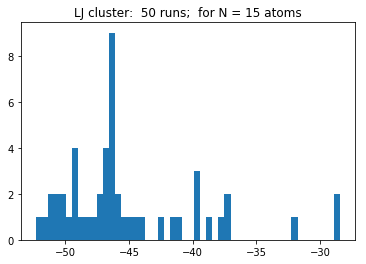

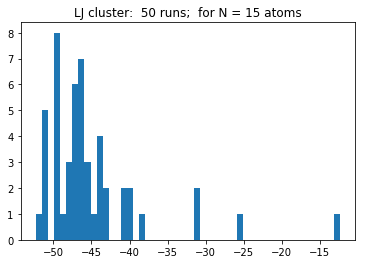

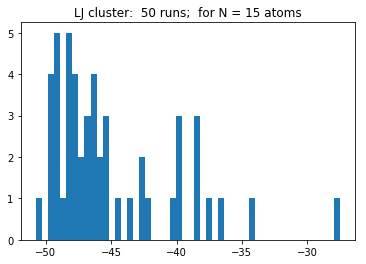

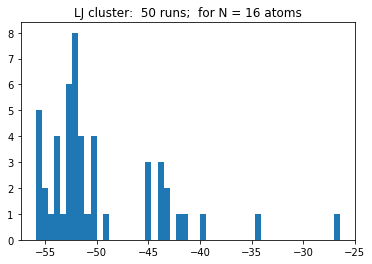

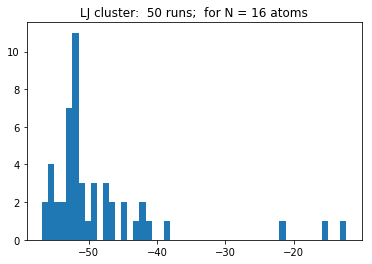

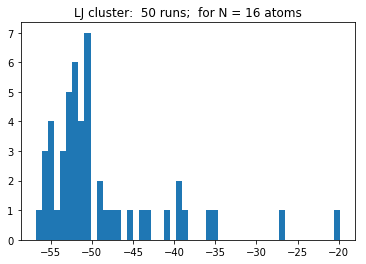

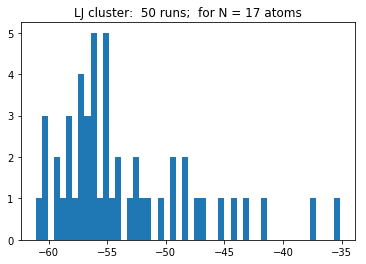

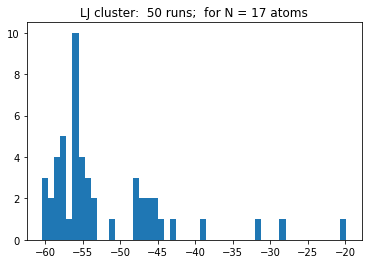

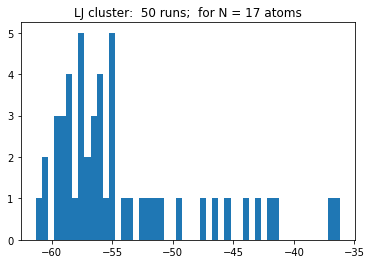

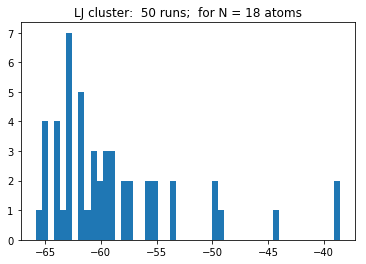

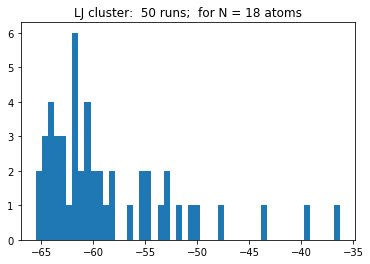

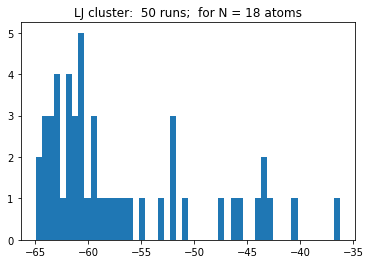

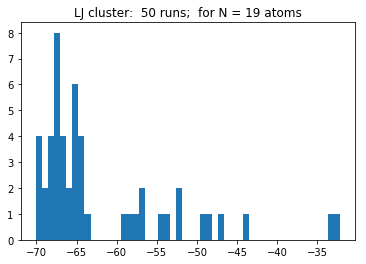

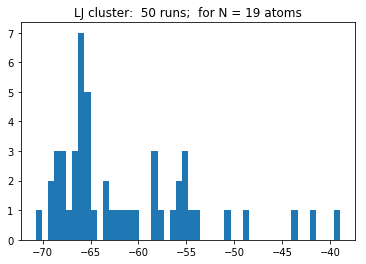

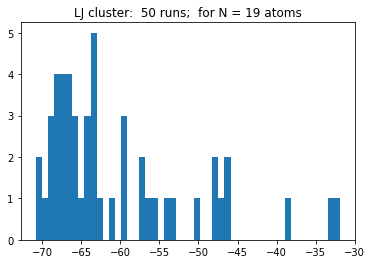

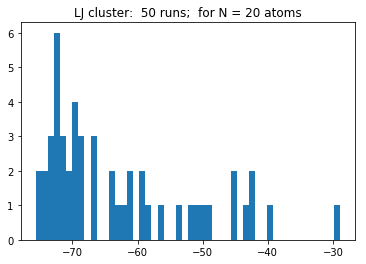

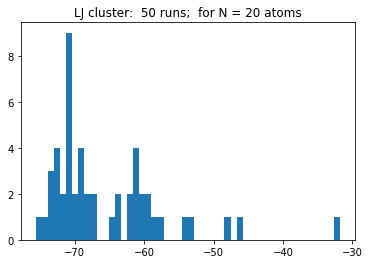

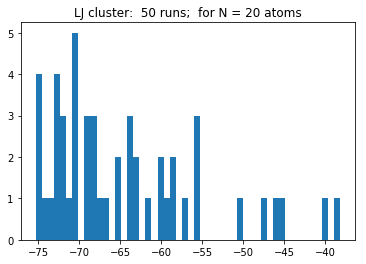

In [3]:

methodlist = ['Nelder-Mead','CG','BFGS']
for i in range(3,21):
    for method in methodlist:
        f_values.clear()
        t1 = time.time()
        N_atom = i
        df.loc[(method,'ground state'),i] = ground_state_potential(N_atom, method)
        plt.title('LJ cluster:  '+ str(N_attempts)+ ' runs;  for N = ' + str(N_atom)+' atoms')
        plt.hist(f_values,50)
        plt.show()
        farray = np.array(f_values) 
        t2 = time.time()
        df.loc[(method,'computation time'),i] = t2 - t1
        


In [4]:
df


3        4        5        6        7   \
Nelder-Mead ground state           -3       -6 -9.10385 -12.3029 -16.5054   
            computation time   1.5706   6.3668  14.7949  28.9573  54.8877   
CG          ground state           -3       -6 -9.10385 -12.3029 -16.5054   
            computation time  1.50868  5.95027  12.9501  28.4775  53.1202   
BFGS        ground state           -3       -6 -9.10385 -12.7121 -16.5054   
            computation time  1.49377  6.43997  14.1648  30.2114  49.3356   

                                   8        9        10       11       12  \
Nelder-Mead ground state     -19.8215 -24.1134 -28.4225  -32.766 -37.9676   
            computation time  85.9679  141.102  238.368    345.6  398.098   
CG          ground state     -19.8215 -24.1134 -28.4225 -31.9147 -37.9676   
            computation time  82.1258  132.457   197.28  283.869  427.473   
BFGS        ground state     -19.8215 -24.1134 -28.4225  -32.766 -36.2532   
            computation time  88.9415  139.307  191.597  312.887  382.883   

                                   13       14       15       16       17  \
Nelder-Mead ground state      -41.472 -47.8452 -52.3226 -55.9067 -61.0945   
            computation time  557.319  644.359  1035.37  1252.97  2704.05   
CG          ground state     -44.3268 -47.8452 -52.3226 -56.8157 -60.4477   
            computation time  593.267  696.051  892.275  1251.46  2507.64   
BFGS        ground state      -41.472 -47.8452  -50.772 -56.8157  -61.318   
            computation time  618.967   696.79  1118.16  1687.95  2028.12   

                                   18       19       20  
Nelder-Mead ground state     -65.8423 -70.0773 -75.6384  
            computation time  2018.68  3269.22  4108.85  
CG          ground state     -65.5341 -70.7257 -75.6004  
            computation time  2501.22  3074.09  3683.82  
BFGS        ground state     -64.9391 -70.8187 -75.3155  
            computation time   2365.6  3942.64  3608.36

In [ ]:
pos = init_pos(N_atom)
print(pos)
minimizer_kwargs = {"method":"CG"}
basinhopping(Total_Energy, pos, minimizer_kwargs= minimizer_kwargs , niter=200)

[3.42330701 2.33946125 3.04329299 3.25731278 1.73564953 4.20728369
 3.36592415 0.2245659  0.88933522 3.33937086 4.66552163 2.19925013
 0.07381932 3.34106702 3.37056525 4.63744666 4.9455423  2.27493859
 2.17103193 3.90571971 2.58566018 2.82393684 1.6890437  0.58152702
 1.93592298 3.75376608 1.98262173 1.53379468 1.23799984 3.80558593
 3.85255215 0.98190731 0.8109023  1.77268384 0.62070837 3.67411259
 3.36014131 0.61749591 2.12077611 4.79511019 2.98003301 1.05402596
 4.63471058 4.80772093 4.41374894 4.93867483 4.78000427 3.39234472
 2.69910591 4.47869338 3.93754021 2.99059496 4.81457092 1.71073743
 0.73838831 4.90466596 1.59163974 0.09986073 4.24576157 4.29699622]
